# Notebook 1: Setup, Exploration & Cleaning

**Phases 1-3:** Project Setup, Data Exploration, and Data Cleaning

**Dataset:** NYC Taxi Trip Dataset

**Focus:** Getting data ready for analysis - loading, understanding, and cleaning messy real-world data.

---

## Phase 1: Project Setup & Data Acquisition

### Learning Objectives
- Set up the analysis environment
- Load data from files
- Perform initial data inspection
- Understand data structure and schema

### Step 1: Import Libraries

In [1]:
# Core data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter display
from IPython.display import display

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("Libraries imported successfully!")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")

Libraries imported successfully!
pandas version: 2.3.3
numpy version: 2.3.4


### Step 2: Load the Data

**NYC Taxi Trip Dataset**

For this lecture, we'll use a sample of NYC Taxi data. In practice, you might:
- Download from NYC TLC website
- Use a pre-processed sample
- Work with Parquet files for better performance

In [2]:
# Load the taxi trip data
# Note: In practice, you'd download this from NYC TLC or use a provided sample
# For this demo, we'll assume the file is in a 'data' directory

# Option 1: Load from CSV (if file is small enough)
# df = pd.read_csv('data/nyc_taxi_trips.csv')

# Option 2: Load from Parquet (more efficient for large files)
# df = pd.read_parquet('data/nyc_taxi_trips.parquet')

# Option 3: Load in chunks for very large files
# chunk_list = []
# for chunk in pd.read_csv('data/nyc_taxi_trips.csv', chunksize=100000):
#     chunk_list.append(chunk)
# df = pd.concat(chunk_list, ignore_index=True)

# For this demo, let's create a realistic sample dataset
# In the actual lecture, we'd load real data
print("Loading NYC Taxi Trip data...")

# Create sample data that mimics NYC Taxi structure
np.random.seed(42)
n_trips = 100000

# Generate realistic taxi trip data
dates = pd.date_range('2023-01-01', '2023-12-31', freq='h')
sample_dates = np.random.choice(dates, n_trips)

df = pd.DataFrame({
    'pickup_datetime': sample_dates,
    'dropoff_datetime': sample_dates + pd.to_timedelta(np.random.exponential(0.5, n_trips), unit='h'),
    'passenger_count': np.random.choice([1, 2, 3, 4, 5, 6], n_trips, p=[0.4, 0.3, 0.15, 0.1, 0.04, 0.01]),
    'trip_distance': np.random.lognormal(1.5, 0.8, n_trips),
    'pickup_longitude': -73.9 + np.random.normal(0, 0.1, n_trips),
    'pickup_latitude': 40.7 + np.random.normal(0, 0.1, n_trips),
    'dropoff_longitude': -73.9 + np.random.normal(0, 0.1, n_trips),
    'dropoff_latitude': 40.7 + np.random.normal(0, 0.1, n_trips),
    'fare_amount': None,  # Will calculate based on distance
    'tip_amount': None,   # Will calculate
    'total_amount': None  # Will calculate
})

# Calculate fare (simplified NYC taxi fare structure)
df['fare_amount'] = 2.5 + df['trip_distance'] * 2.0 + np.random.normal(0, 1, n_trips)
df['fare_amount'] = df['fare_amount'].clip(lower=2.5)

# Calculate tip (10-20% of fare, with some zeros)
tip_rate = np.random.choice([0, 0.1, 0.15, 0.2], n_trips, p=[0.3, 0.3, 0.25, 0.15])
df['tip_amount'] = df['fare_amount'] * tip_rate

# Total amount
df['total_amount'] = df['fare_amount'] + df['tip_amount'] + 0.5  # + $0.50 base fee

# Add some missing values (realistic data quality issues)
missing_indices = np.random.choice(df.index, size=int(n_trips * 0.05), replace=False)
df.loc[missing_indices, 'tip_amount'] = np.nan

# Add some outliers (data quality issues)
outlier_indices = np.random.choice(df.index, size=int(n_trips * 0.01), replace=False)
df.loc[outlier_indices, 'trip_distance'] = df.loc[outlier_indices, 'trip_distance'] * 10  # Unrealistic long trips

print(f"Data loaded: {len(df):,} trips")
print(f"Date range: {df['pickup_datetime'].min()} to {df['pickup_datetime'].max()}")

Loading NYC Taxi Trip data...
Data loaded: 100,000 trips
Date range: 2023-01-01 00:00:00 to 2023-12-31 00:00:00


### Step 3: Initial Data Inspection

In [3]:
# Basic information about the dataset
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

print(f"\nShape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumn names:")
print(df.columns.tolist())

print(f"\nData types:")
print(df.dtypes)

print(f"\nMemory usage:")
print(df.memory_usage(deep=True).sum() / 1024**2, "MB")

DATASET OVERVIEW

Shape: 100,000 rows × 11 columns

Column names:
['pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'tip_amount', 'total_amount']

Data types:
pickup_datetime      datetime64[ns]
dropoff_datetime     datetime64[ns]
passenger_count               int64
trip_distance               float64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
fare_amount                 float64
tip_amount                  float64
total_amount                float64
dtype: object

Memory usage:
8.392459869384766 MB


In [4]:
# First few rows
print("=" * 60)
print("FIRST 5 ROWS")
print("=" * 60)
display(df.head())

FIRST 5 ROWS


,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount
0,2023-10-30 22:00:00,2023-10-30 22:00:05.584761453,1,6.231866,-73.827901,40.595958,-73.987685,40.879620,14.562858,2.184429,17.247287
1,2023-02-05 20:00:00,2023-02-05 20:05:49.324747491,4,11.260719,-74.109148,40.980069,-73.835655,40.641873,25.008903,NaN,29.260238
2,2023-08-13 14:00:00,2023-08-13 14:50:33.995686545,4,4.895030,-73.685464,40.459874,-73.869255,40.689745,11.689543,1.753431,13.942974
3,2023-08-05 07:00:00,2023-08-05 07:00:55.733950638,1,11.856766,-73.696963,40.756257,-74.028883,40.727667,26.637052,2.663705,29.800758
4,2023-08-27 22:00:00,2023-08-27 22:32:50.897202000,1,4.470710,-73.881013,40.684811,-73.937224,40.810296,10.894227,1.089423,12.483650


In [5]:
# Summary statistics
print("=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
display(df.describe())

SUMMARY STATISTICS


,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount
count,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,95000.000000,100000.000000
mean,2023-07-02 03:46:00.912000,2023-07-02 04:16:06.408180480,2.113610,6.679637,-73.900007,40.699504,-73.900182,40.700093,14.768405,1.436245,16.705250
min,2023-01-01 00:00:00,2023-01-01 00:01:00.096015403,1.000000,0.143542,-74.324223,40.294188,-74.311128,40.292138,2.500000,0.000000,3.000000
25%,2023-04-01 21:00:00,2023-04-01 21:22:21.927545344,1.000000,2.621183,-73.967877,40.632107,-73.967892,40.632974,7.715674,0.000000,8.945097
50%,2023-07-02 10:00:00,2023-07-02 10:11:44.960358656,2.000000,4.508848,-73.899529,40.699482,-73.900343,40.700996,11.476297,1.063234,13.074568
75%,2023-10-01 06:00:00,2023-10-01 06:19:54.444060416,3.000000,7.798730,-73.832446,40.766953,-73.832785,40.767367,17.878095,1.993093,20.124721
max,2023-12-31 00:00:00,2023-12-31 01:58:21.312367590,6.000000,440.736568,-73.502231,41.124266,-73.470405,41.120652,363.178078,51.780771,363.678078
std,NaN,NaN,1.211733,9.578927,0.100251,0.100051,0.099853,0.099751,11.618976,1.757201,12.814532


In [6]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES")
print("=" * 60)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
display(missing_df)

MISSING VALUES


,Missing Count,Missing Percentage
tip_amount,5000,5.0


---

## Phase 2: Data Exploration & Understanding

### Learning Objectives
- Understand data distributions
- Identify relationships between variables
- Create initial visualizations
- Spot potential data quality issues

### Step 1: Basic Statistics and Distributions

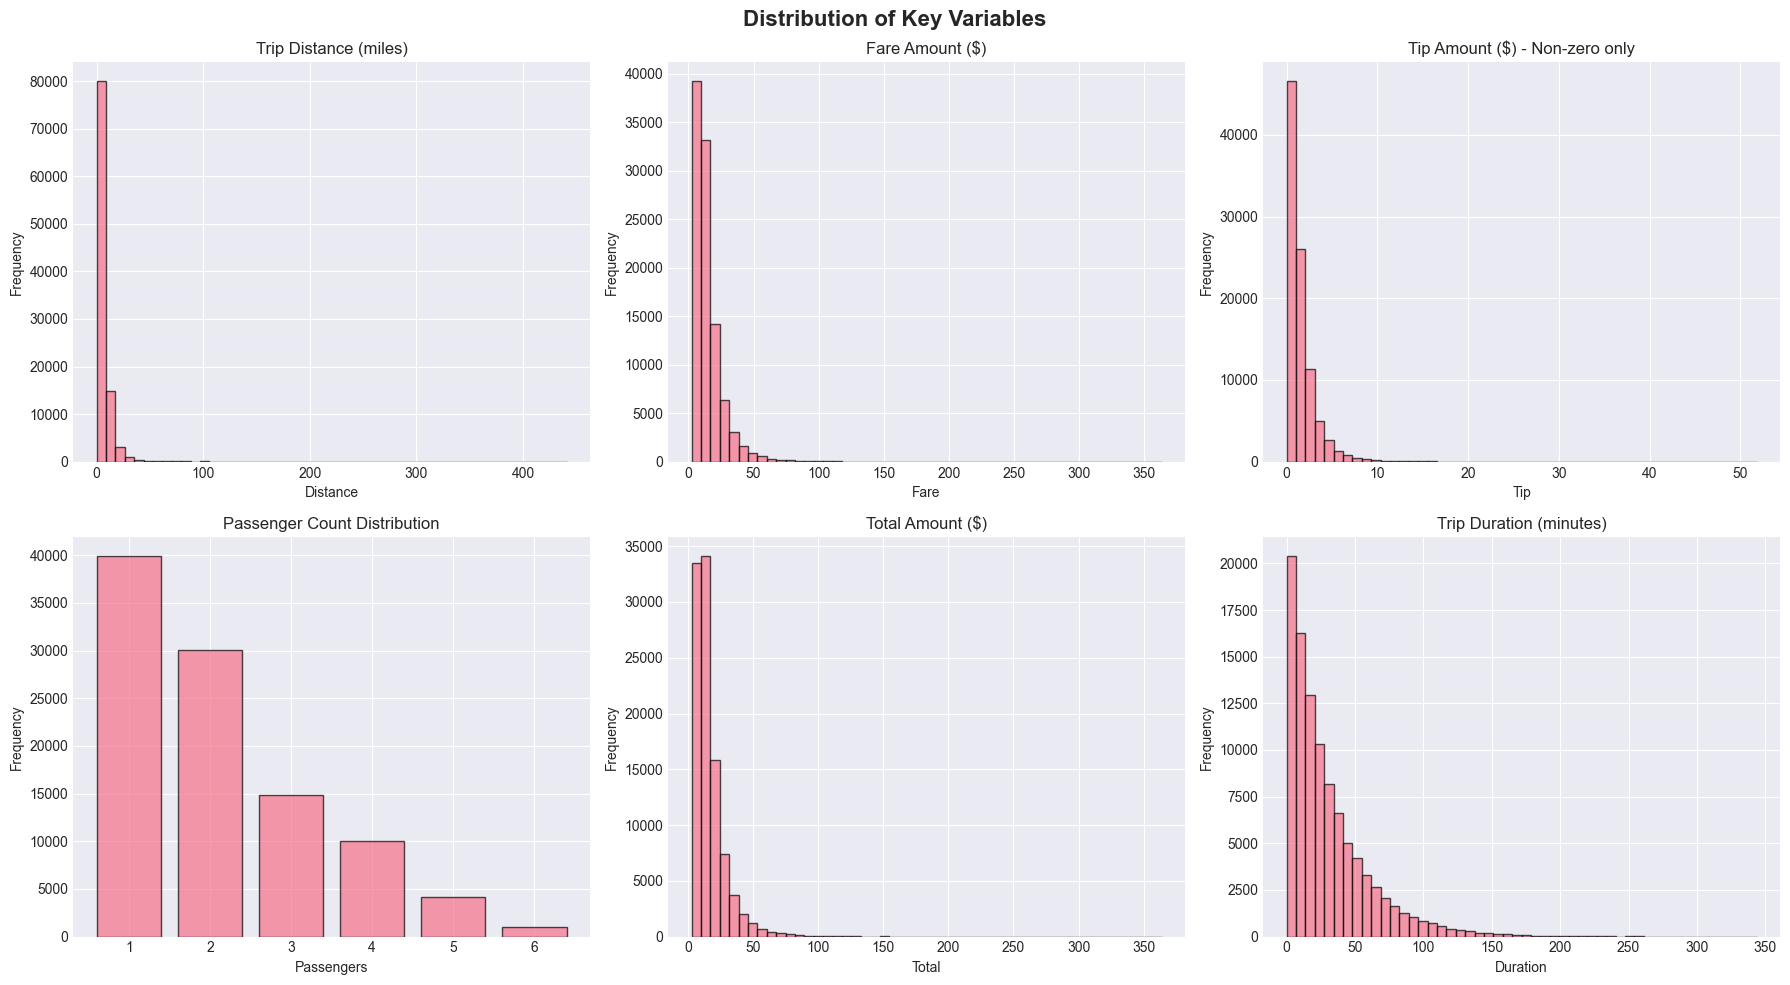

In [7]:
# Distribution of key numeric variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Key Variables', fontsize=16, fontweight='bold')

# Trip distance
axes[0, 0].hist(df['trip_distance'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Trip Distance (miles)')
axes[0, 0].set_xlabel('Distance')
axes[0, 0].set_ylabel('Frequency')

# Fare amount
axes[0, 1].hist(df['fare_amount'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Fare Amount ($)')
axes[0, 1].set_xlabel('Fare')
axes[0, 1].set_ylabel('Frequency')

# Tip amount (excluding zeros)
tips_nonzero = df['tip_amount'].dropna()
axes[0, 2].hist(tips_nonzero, bins=50, edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Tip Amount ($) - Non-zero only')
axes[0, 2].set_xlabel('Tip')
axes[0, 2].set_ylabel('Frequency')

# Passenger count
passenger_counts = df['passenger_count'].value_counts().sort_index()
axes[1, 0].bar(passenger_counts.index, passenger_counts.values, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Passenger Count Distribution')
axes[1, 0].set_xlabel('Passengers')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xticks(passenger_counts.index)

# Total amount
axes[1, 1].hist(df['total_amount'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Total Amount ($)')
axes[1, 1].set_xlabel('Total')
axes[1, 1].set_ylabel('Frequency')

# Trip duration (calculate from datetime columns)
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60  # minutes
axes[1, 2].hist(df['trip_duration'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 2].set_title('Trip Duration (minutes)')
axes[1, 2].set_xlabel('Duration')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Step 2: Trends Over Time

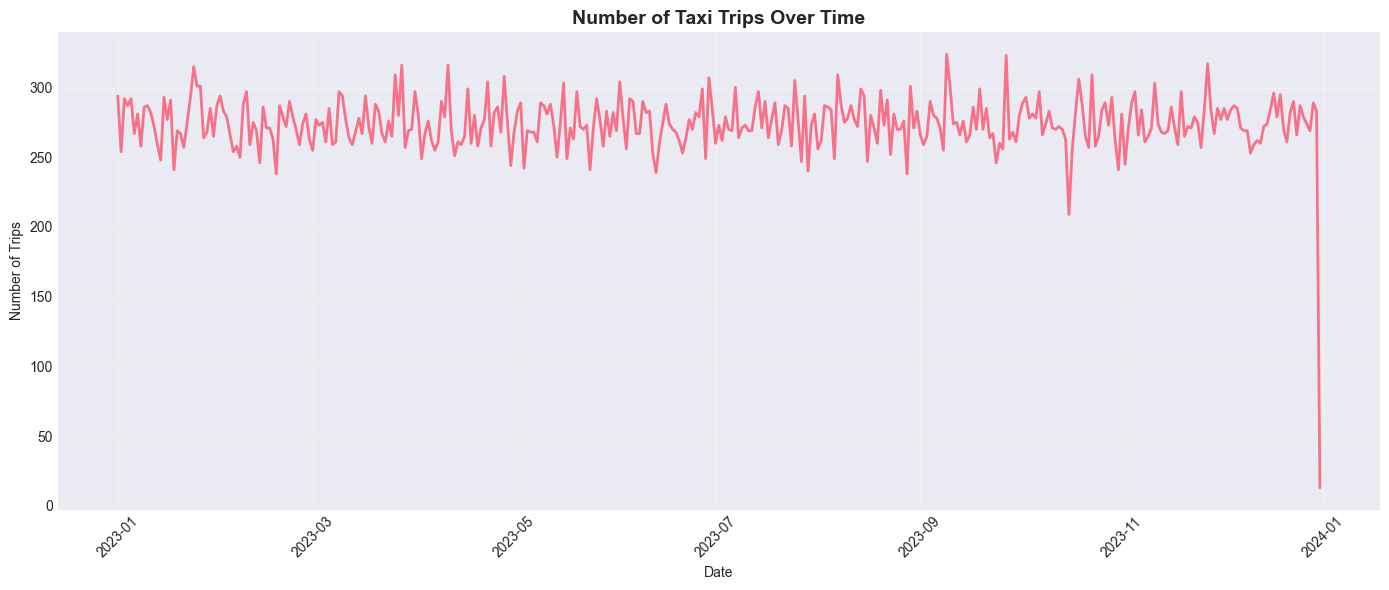

Average trips per day: 274
Peak day: 2023-09-09 with 324 trips


In [8]:
# Plot trips over time to see temporal patterns
df['pickup_date'] = pd.to_datetime(df['pickup_datetime']).dt.date
trips_by_date = df.groupby('pickup_date').size()

plt.figure(figsize=(14, 6))
plt.plot(trips_by_date.index, trips_by_date.values, linewidth=2)
plt.title('Number of Taxi Trips Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average trips per day: {trips_by_date.mean():.0f}")
print(f"Peak day: {trips_by_date.idxmax()} with {trips_by_date.max()} trips")

### Step 3: Relationships Between Variables

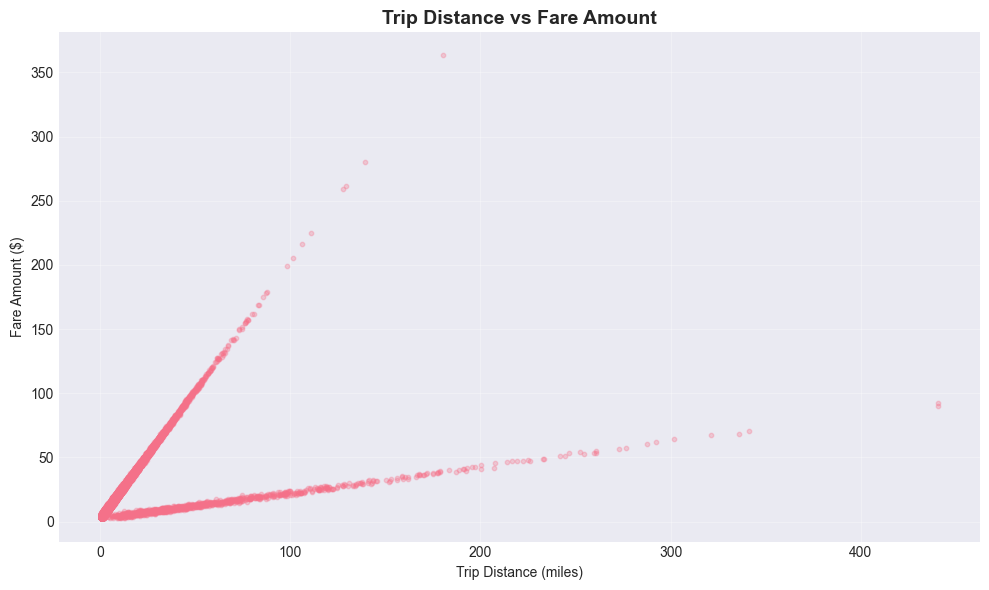

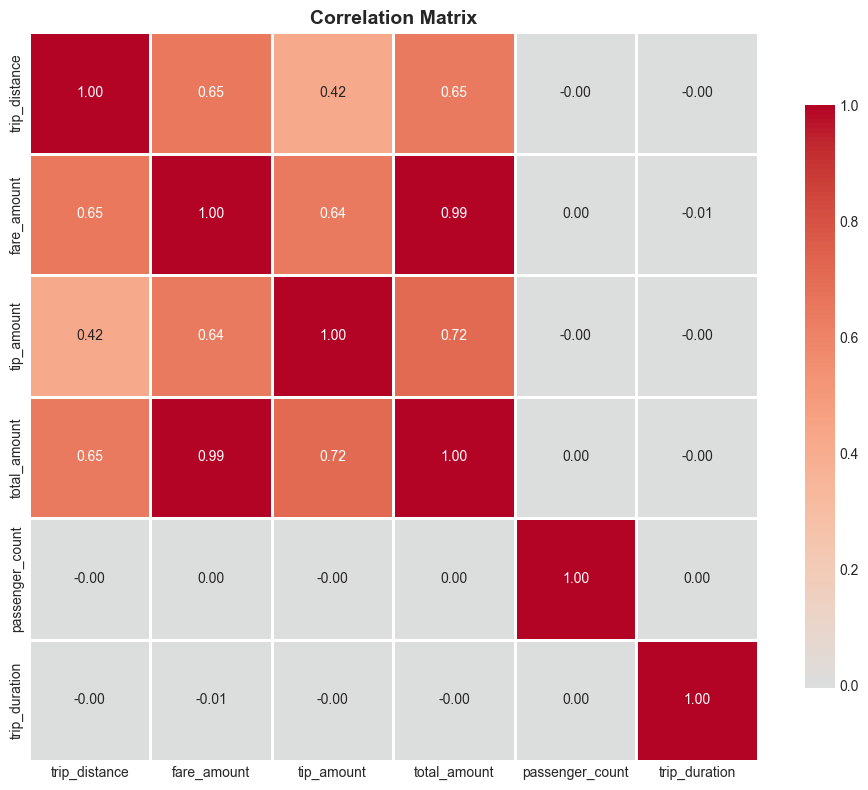

In [9]:
# Scatter plot: Distance vs Fare
plt.figure(figsize=(10, 6))
plt.scatter(df['trip_distance'], df['fare_amount'], alpha=0.3, s=10)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Trip Distance vs Fare Amount', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Correlation matrix
numeric_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'passenger_count', 'trip_duration']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---

## Phase 3: Data Cleaning & Preprocessing

### Learning Objectives
- Identify and handle missing data
- Detect and handle outliers
- Validate data ranges
- Clean data systematically

### Step 1: Missing Data Analysis

MISSING DATA ANALYSIS


,Column,Missing Count,Missing Percentage,Data Type
9,tip_amount,5000,5.0,float64


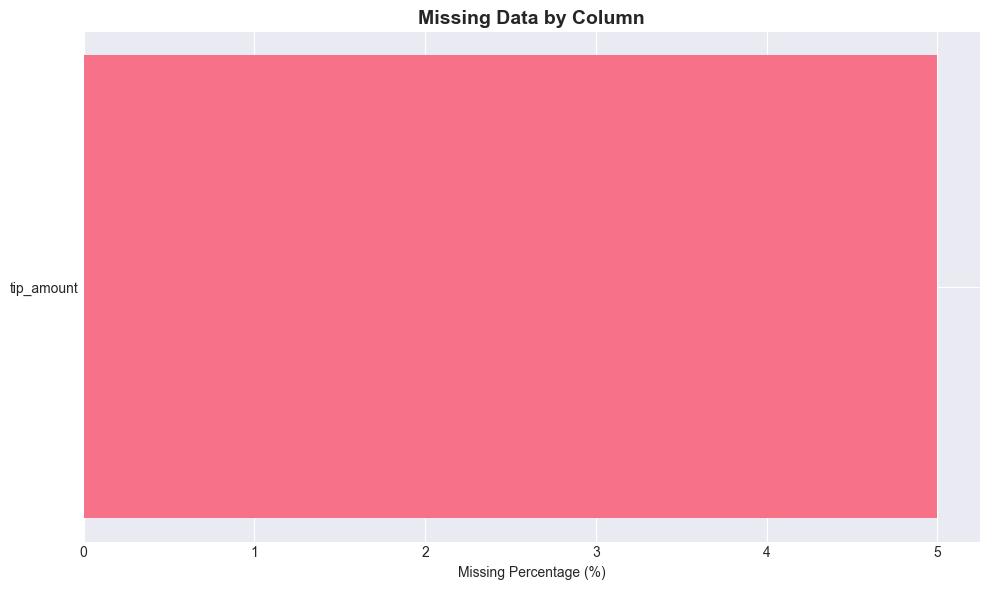

In [10]:
print("=" * 60)
print("MISSING DATA ANALYSIS")
print("=" * 60)

# Detailed missing data analysis
missing_analysis = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum().values,
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).values,
    'Data Type': df.dtypes.values
})
missing_analysis = missing_analysis[missing_analysis['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

display(missing_analysis)

# Visualize missing data pattern
if len(missing_analysis) > 0:
    plt.figure(figsize=(10, 6))
    plt.barh(missing_analysis['Column'], missing_analysis['Missing Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Data by Column', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

### Step 2: Handle Missing Data

In [11]:
# Strategy for handling missing data
# For tip_amount: Missing likely means no tip (0), but we'll be conservative
# and use median imputation for now

print("Handling missing data...")
print(f"Missing tip_amount before: {df['tip_amount'].isnull().sum()}")

# Option 1: Fill with 0 (assuming missing = no tip)
# df['tip_amount'] = df['tip_amount'].fillna(0)

# Option 2: Fill with median (more conservative)
df['tip_amount'] = df['tip_amount'].fillna(df['tip_amount'].median())

# Recalculate total_amount
df['total_amount'] = df['fare_amount'] + df['tip_amount'] + 0.5

print(f"Missing tip_amount after: {df['tip_amount'].isnull().sum()}")
print("Missing data handling complete!")

Handling missing data...
Missing tip_amount before: 5000
Missing tip_amount after: 0
Missing data handling complete!


### Step 3: Outlier Detection

In [12]:
print("=" * 60)
print("OUTLIER DETECTION")
print("=" * 60)

# Identify outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check trip_distance outliers
distance_outliers, dist_lower, dist_upper = detect_outliers_iqr(df, 'trip_distance')
print(f"\nTrip Distance Outliers:")
print(f"  Lower bound: {dist_lower:.2f} miles")
print(f"  Upper bound: {dist_upper:.2f} miles")
print(f"  Number of outliers: {len(distance_outliers):,} ({len(distance_outliers)/len(df)*100:.2f}%)")

# Check fare_amount outliers
fare_outliers, fare_lower, fare_upper = detect_outliers_iqr(df, 'fare_amount')
print(f"\nFare Amount Outliers:")
print(f"  Lower bound: ${fare_lower:.2f}")
print(f"  Upper bound: ${fare_upper:.2f}")
print(f"  Number of outliers: {len(fare_outliers):,} ({len(fare_outliers)/len(df)*100:.2f}%)")

# Check trip_duration outliers (unrealistic trips)
duration_outliers, dur_lower, dur_upper = detect_outliers_iqr(df, 'trip_duration')
print(f"\nTrip Duration Outliers:")
print(f"  Lower bound: {dur_lower:.2f} minutes")
print(f"  Upper bound: {dur_upper:.2f} minutes")
print(f"  Number of outliers: {len(duration_outliers):,} ({len(duration_outliers)/len(df)*100:.2f}%)")

OUTLIER DETECTION

Trip Distance Outliers:
  Lower bound: -5.15 miles
  Upper bound: 15.57 miles
  Number of outliers: 6,731 (6.73%)

Fare Amount Outliers:
  Lower bound: $-7.53
  Upper bound: $33.12
  Number of outliers: 6,146 (6.15%)

Trip Duration Outliers:
  Lower bound: -40.71 minutes
  Upper bound: 90.94 minutes
  Number of outliers: 4,885 (4.88%)


### Step 4: Check for Duplicates

In [13]:
# Check for duplicate rows
print("=" * 60)
print("DUPLICATE DETECTION")
print("=" * 60)

# Check for completely duplicate rows
n_duplicates = df.duplicated().sum()
print(f"Completely duplicate rows: {n_duplicates:,}")

# Check for duplicates based on key columns (same trip recorded twice)
key_cols = ['pickup_datetime', 'dropoff_datetime', 'pickup_latitude', 'pickup_longitude']
n_key_duplicates = df.duplicated(subset=key_cols).sum()
print(f"Duplicate trips (same pickup/dropoff): {n_key_duplicates:,}")

# Show examples if any duplicates exist
if n_duplicates > 0:
    print("\nExample duplicate rows:")
    display(df[df.duplicated(keep=False)].head(10))

DUPLICATE DETECTION


Completely duplicate rows: 0
Duplicate trips (same pickup/dropoff): 0


### Step 5: Handle Outliers

In [14]:
# Handle outliers based on domain knowledge
print("\nHandling outliers...")

# Remove unrealistic trip distances (> 50 miles in NYC is very unusual)
# Or cap them at a reasonable maximum
df_clean = df.copy()
print(f"Original shape: {df_clean.shape}")

# Remove duplicate rows (if any)
df_clean = df_clean.drop_duplicates()
print(f"After removing duplicates: {df_clean.shape}")

# Cap trip_distance at 50 miles (very generous for NYC)
df_clean['trip_distance'] = df_clean['trip_distance'].clip(upper=50)

# Remove trips with negative or zero distance
df_clean = df_clean[df_clean['trip_distance'] > 0]

# Remove trips with unrealistic duration (> 2 hours is very unusual)
df_clean = df_clean[df_clean['trip_duration'] <= 120]  # 2 hours max

# Remove trips with negative fare
df_clean = df_clean[df_clean['fare_amount'] > 0]

# Remove trips with unrealistic passenger counts
df_clean = df_clean[df_clean['passenger_count'].between(1, 6)]

print(f"Cleaned shape: {df_clean.shape}")
print(f"Removed {len(df) - len(df_clean):,} rows ({(len(df) - len(df_clean))/len(df)*100:.2f}%)")


Handling outliers...
Original shape: (100000, 13)
After removing duplicates: (100000, 13)
Cleaned shape: (98173, 13)
Removed 1,827 rows (1.83%)


### Step 6: Data Type Validation and Conversion

In [15]:
# Ensure datetime columns are properly typed
print("\nValidating and converting data types...")

df_clean['pickup_datetime'] = pd.to_datetime(df_clean['pickup_datetime'])
df_clean['dropoff_datetime'] = pd.to_datetime(df_clean['dropoff_datetime'])

# Ensure numeric columns are proper types
numeric_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 
                'passenger_count', 'trip_duration']
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Check for any remaining issues
print("\nFinal data quality check:")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Data types:\n{df_clean.dtypes}")
print(f"\nFinal dataset shape: {df_clean.shape}")


Validating and converting data types...

Final data quality check:
Missing values: 0
Data types:
pickup_datetime      datetime64[ns]
dropoff_datetime     datetime64[ns]
passenger_count               int64
trip_distance               float64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
fare_amount                 float64
tip_amount                  float64
total_amount                float64
trip_duration               float64
pickup_date                  object
dtype: object

Final dataset shape: (98173, 13)


### Step 7: Save Cleaned Data

In [16]:
# Save cleaned dataset for next notebook
output_dir = '../output'
import os
os.makedirs(output_dir, exist_ok=True)

df_clean.to_csv(f'{output_dir}/01_cleaned_taxi_data.csv', index=False)
print(f"\nCleaned data saved to: {output_dir}/01_cleaned_taxi_data.csv")
print("Ready for next phase: Data Wrangling & Feature Engineering!")


Cleaned data saved to: ../output/01_cleaned_taxi_data.csv
Ready for next phase: Data Wrangling & Feature Engineering!


---

## Summary

**What we accomplished:**

1. ✅ **Loaded data** and performed initial inspection
2. ✅ **Explored distributions** and relationships
3. ✅ **Identified missing data** and handled it appropriately
4. ✅ **Detected outliers** using statistical methods
5. ✅ **Cleaned data** based on domain knowledge
6. ✅ **Validated data types** and ranges
7. ✅ **Saved cleaned dataset** for next phase

**Key Takeaways:**
- Always inspect data before cleaning
- Use domain knowledge to guide cleaning decisions
- Document your cleaning steps
- Save intermediate results

**Next:** Notebook 2 will focus on data wrangling, merging, and feature engineering.
